In [1]:
import pandas as pd
import requests


/tmp/ipykernel_6134/1213341086.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data preparation

### Listings

In [23]:
listings = pd.read_csv('../data - AirBnb/listings.csv')
listings = listings[["latitude", "longitude", "name", "room_type", "neighbourhood_group", "neighbourhood",
    "price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "availability_365"]]

In [24]:
# berlin_coords = [52.51687767752022, 13.389323026028334]

# m = leafmap.Map()
# m = leafmap.Map(center=berlin_coords, zoom = 11)
# m.add_geojson("../data - AirBnb/neighbourhoods.geojson", layer_name="Neighbourhoods")
# df2 = listings[:1000]
# for _, row in df2.iterrows():
#     m.add_marker([row['latitude'], row['longitude']], radius=1)
# m

### Points of interest

In [25]:
def fetch_data_from_link(link):
    try:
        response = requests.get(link)
        if response.status_code == 200:
            json_data = response.json()
            statistics = json_data.get('statistics', {})
            foursquare_stats = statistics.get('Foursquare', {})

            return (
                foursquare_stats.get('checkinsCount', None),
                foursquare_stats.get('usersCount', None),
                foursquare_stats.get('tipCount', None),
                foursquare_stats.get('likes', None),
                json_data.get('numReviews', None)
            )
        else:
            return (f"Error: {response.status_code}",) 
    except requests.exceptions.RequestException as e:
        return (f"Error: {e}",)

poi = pd.read_csv("../data - Tourpedia/berlin-poi.csv", index_col='id')
poi = poi[poi['type'] == 'poi']
poi = poi[1:5500]
poi = poi[["lat", "lng", "name", "category", "link1"]]
poi[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = poi['link1'].apply(fetch_data_from_link).apply(pd.Series)
poi = poi.drop(columns=['link1'])
poi = poi.fillna(0)
poi.head()


### Restaurants

In [ ]:
rst = pd.read_csv("../data - Tourpedia/berlin-restaurant.csv", index_col='id')
rst = rst[rst['category'] == 'restaurant']
rst = rst[1:4500]
rst = rst[["lat", "lng", "name", "subCategory", "details"]]
rst[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = rst['details'].apply(fetch_data_from_link).apply(pd.Series)
rst = rst.drop(columns=['details'])
rst = rst.fillna(0)
rst.head()

,lat,lng,name,subCategory,checkinsCount,usersCount,tipCount,likes,numReviews
id,,,,,,,,,
91920,52.506011569827,13.32805032307,Hotel Savoy Berlin,Hotel,735.0,283.0,6.0,4.0,6.0
91947,52.511193329824,13.449347019196,Upstalsboom Hotel,Hotel,744.0,170.0,6.0,0.0,6.0
91956,52.500142117474,13.319578369231,Hotel Bleibtreu,Hotel,216.0,112.0,5.0,2.0,5.0
92003,52.502707245292,13.331705331802,Hotel Concorde Berlin,Hotel,2681.0,1155.0,30.0,95.0,30.0
92007,52.504889734436,13.385203007038,relexa hotel Stuttgarter Hof,Hotel,413.0,205.0,3.0,5.0,3.0


### Accomodation

In [ ]:
acc = pd.read_csv("../data - Tourpedia/berlin-accommodation.csv", index_col='id')
acc = acc[acc['category'] == 'accommodation']
acc = acc[["lat", "lng", "name", "subCategory", "details"]]
acc[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = acc['details'].apply(fetch_data_from_link).apply(pd.Series)
acc = acc.drop(columns=['details'])
acc = acc.fillna(0)
acc.head()

,lat,lng,name,subCategory,checkinsCount,usersCount,tipCount,likes,numReviews
id,,,,,,,,,
91904,52.530068167132,13.388135746622,Hotel Zarenhof Berlin-Mitte,Hotel,141,69.0,1.0,0.0,1.0
91921,52.501832343626,13.347193587317,Best Western Hotel President Berlin,Hotel,531,291.0,10.0,1.0,10.0
91934,52.501500248909,13.277047276497,Motel Avus,Hotel,75.0,48.0,0.0,0.0,0.0
91940,52.507759698801,13.328216718728,Hotel Astoria,Hotel,181,41.0,1.0,2.0,1.0
91942,52.495192803401,13.310279846191,Hotel Wittelsbach,Hotel,113,57.0,2.0,1.0,2.0


### Attractions

In [ ]:
att = pd.read_csv("../data - Tourpedia/berlin-attraction.csv", skiprows=3, names = ["address", "category","id", "lat", "lng",
                                                                                    "location", "name", "unq_id", "polarity",
                                                                                    "subCategory", "details", "reviews"])
att = att[(att['category'] == 'attraction') & (att['subCategory'] != 'Hotel')]
att = att[1:6500]
att = att[["lat", "lng", "name", "subCategory", "details"]]
att[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = att['details'].apply(fetch_data_from_link).apply(pd.Series)
att = att.drop(columns=['details'])
att = att.fillna(0)
att.head()

,lat,lng,name,subCategory,checkinsCount,usersCount,tipCount,likes,numReviews
1,52.508052842516,13.426333553402,Köpi,Rock Club,183.0,97.0,3.0,9.0,3.0
4,52.541703653439,13.421982957295,Cocktail Bar X,Cocktail Bar,211.0,139.0,3.0,4.0,3.0
5,52.487675,13.351513,Pinguin Club,Bar,41.0,33.0,1.0,2.0,1.0
6,52.504698864794,13.324902694366,Gainsbourg,Bar,361.0,203.0,8.0,6.0,8.0
7,52.486752629238,13.378601074219,Golgatha,Beer Garden,1022.0,718.0,14.0,18.0,14.0


### Public transport

In [ ]:
stops = pd.read_csv("../GTFS/stops.txt")
stops = stops[['stop_name', 'stop_lat', 'stop_lon']]

### Aggregating

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

neighborhoods_gdf = gpd.read_file('../data - AirBnb/neighbourhoods.geojson')

listings_gdf = gpd.GeoDataFrame(
    listings, 
    geometry=gpd.points_from_xy(listings['longitude'], listings['latitude'])
)

poi_gdf = gpd.GeoDataFrame(
    poi, 
    geometry=gpd.points_from_xy(poi['lng'], poi['lat'])
)

att_gdf = gpd.GeoDataFrame(
    att, 
    geometry=gpd.points_from_xy(att['lng'], att['lat'])
)

stops_gdf = gpd.GeoDataFrame(
    stops, 
    geometry=gpd.points_from_xy(stops['stop_lon'], stops['stop_lat'])
)

merged_listings = gpd.sjoin(listings_gdf, neighborhoods_gdf, op='within')
merged_poi = gpd.sjoin(poi_gdf, neighborhoods_gdf, op='within')
merged_att = gpd.sjoin(att_gdf, neighborhoods_gdf, op='within')
merged_stops = gpd.sjoin(stops_gdf, neighborhoods_gdf, op='within')

agg_listings = merged_listings.groupby('neighbourhood_left').agg({
    'price': 'mean',
    'reviews_per_month': 'mean',  
})
agg_listings = agg_listings.reset_index()
agg_listings = agg_listings.rename(columns={'neighbourhood_left': 'neighbourhood'})

agg_att = merged_att.groupby('neighbourhood').agg({
    'checkinsCount': 'sum',
    'usersCount': 'sum',
    'tipCount': 'sum',
    'likes': 'sum',
    'numReviews': 'sum',
    'neighbourhood': 'size'  
}).rename(columns={'neighbourhood': 'numRestaurants',
                    'checkinsCount': 'checkinsCount_rest',
                    'usersCount': 'usersCount_rest',
                    'tipCount': 'tipCount_rest',
                    'likes': 'likes_rest',
                    'numReviews': 'numReviews_rest'})

merged_poi = merged_poi[~merged_poi['category'].isin(['Road', 'Subway', 'Light Rail', 'Train Station'])]
agg_poi = merged_poi.groupby('neighbourhood').agg({
    'checkinsCount': 'sum',
    'usersCount': 'sum',
    'tipCount': 'sum',
    'likes': 'sum',
    'numReviews': 'sum',
    'neighbourhood': 'size'  
}).rename(columns={'neighbourhood': 'numPOIs',
                    'checkinsCount': 'checkinsCount_poi',
                    'usersCount': 'usersCount_poi',
                    'tipCount': 'tipCount_poi',
                    'likes': 'likes_poi',
                    'numReviews': 'numReviews_poi'})

agg_stops = merged_stops.groupby('neighbourhood').size().reset_index(name='num_stops')

final_df = agg_listings.merge(agg_poi, how='inner', on='neighbourhood').merge(agg_att, how='inner', on='neighbourhood').merge(agg_stops, how='inner', on='neighbourhood')

/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_5496/774139664.py:26: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_listings = gpd.sjoin(listings_gdf, neighborhoods_gdf, op='within')
/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result,

In [ ]:
final_df = final_df.fillna(0)
final_df.to_csv('../data - AirBnb/data_final.csv')

,Unnamed: 0,neighbourhood,price,reviews_per_month,checkinsCount_poi,usersCount_poi,tipCount_poi,likes_poi,numReviews_poi,numPOIs,checkinsCount_rest,usersCount_rest,tipCount_rest,likes_rest,numReviews_rest,numRestaurants,num_stops,target_variable
0,0,Adlershof,110.270270,0.836667,674.0,173.0,1.0,0.0,1.0,28,1146.0,225.0,16.0,9.0,16.0,36,121,92.259459
1,1,Albrechtstr.,91.820000,1.280000,2229.0,202.0,1.0,0.0,1.0,39,4507.0,979.0,22.0,13.0,22.0,64,114,117.529600
2,2,Alexanderplatz,149.550069,1.658514,19378.0,7214.0,97.0,77.0,97.0,114,119212.0,60204.0,783.0,1136.0,793.0,94,821,248.030925
3,3,Allende-Viertel,44.500000,1.926667,13.0,7.0,0.0,0.0,0.0,4,474.0,116.0,1.0,2.0,1.0,10,15,85.736667
4,4,Alt Treptow,137.981481,0.689419,900.0,404.0,5.0,3.0,5.0,35,8614.0,5170.0,75.0,149.0,74.0,41,62,95.127000


## Is the position or the popularity of Airbnb apartments related to Points of Interest, public transport or other features of the city?

### Random forest features importance

In [40]:
from sklearn.ensemble import RandomForestRegressor

X = final_df.drop(['neighbourhood', 'reviews_per_month', 'price'], axis=1)
y = final_df['reviews_per_month']

rf = RandomForestRegressor()
rf.fit(X, y)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
print(feature_importances.sort_values('Importance', ascending=False))


               Feature  Importance
9           likes_rest    0.155227
7      usersCount_rest    0.148843
12           num_stops    0.119835
0    checkinsCount_poi    0.107632
6   checkinsCount_rest    0.096654
11      numRestaurants    0.092296
5              numPOIs    0.085882
1       usersCount_poi    0.058404
10     numReviews_rest    0.044046
8        tipCount_rest    0.032546
3            likes_poi    0.023996
4       numReviews_poi    0.019140
2         tipCount_poi    0.015499


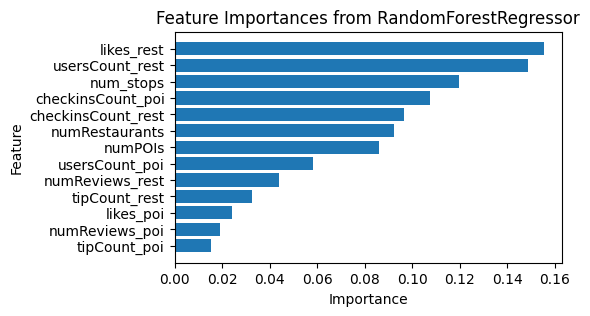

In [41]:
import matplotlib.pyplot as plt

# Assuming 'feature_importances' is the DataFrame containing feature importances
feature_importances_sorted = feature_importances.sort_values('Importance', ascending=True)

# Bar plot of feature importances
plt.figure(figsize=(5, 3))
plt.barh(feature_importances_sorted['Feature'], feature_importances_sorted['Importance'])
plt.title('Feature Importances from RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Linear model with recursive features elimination

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  

X = final_df.drop(['neighbourhood', 'reviews_per_month', 'price'], axis=1)
y = final_df['reviews_per_month']

model = LinearRegression()

rfe = RFE(model, n_features_to_select=1)

fit = rfe.fit(X, y)

ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print(ranking.sort_values('Ranking'))


               Feature  Ranking
2         tipCount_poi        1
4       numReviews_poi        2
8        tipCount_rest        3
10     numReviews_rest        4
3            likes_poi        5
11      numRestaurants        6
5              numPOIs        7
9           likes_rest        8
12           num_stops        9
1       usersCount_poi       10
0    checkinsCount_poi       11
7      usersCount_rest       12
6   checkinsCount_rest       13


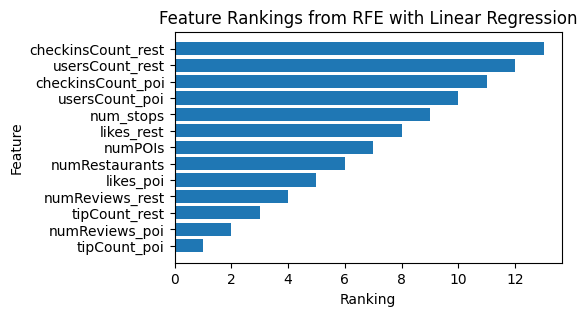

In [43]:
import matplotlib.pyplot as plt

# Assuming 'ranking' is the DataFrame containing feature rankings
ranking_sorted = ranking.sort_values('Ranking')

# Bar plot of feature rankings
plt.figure(figsize=(5, 3))
plt.barh(ranking_sorted['Feature'], ranking_sorted['Ranking'])
plt.title('Feature Rankings from RFE with Linear Regression')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.show()


### Lasso Regression

In [44]:
from sklearn.linear_model import LassoCV

X = final_df.drop(['reviews_per_month', 'neighbourhood', 'price'], axis=1)
y = final_df['reviews_per_month']

lasso_model = LassoCV()
lasso_model.fit(X, y)

lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
important_features_lasso = lasso_coefs[lasso_coefs['Coefficient'] != 0]

print(important_features_lasso)

              Feature  Coefficient
0   checkinsCount_poi    -0.000006
6  checkinsCount_rest    -0.000002
7     usersCount_rest     0.000015


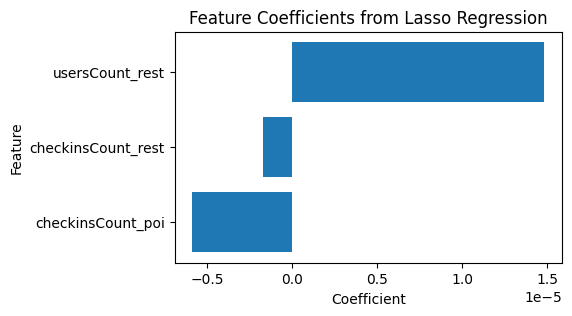

In [45]:
import matplotlib.pyplot as plt

important_features_lasso = lasso_coefs[lasso_coefs['Coefficient'] != 0]

plt.figure(figsize=(5, 3))
plt.barh(important_features_lasso['Feature'], important_features_lasso['Coefficient'])
plt.title('Feature Coefficients from Lasso Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


## How well can good locations for a new Airbnb be predicted?

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
final_df = pd.read_csv('../data - AirBnb/data_fina.csv')
final_df['target_variable'] = final_df['reviews_per_month'] * final_df['price']

X = final_df.drop(['neighbourhood', 'target_variable'], axis=1)
y = final_df['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12239164)


# Fit the scaler on the training data and transform both training and test data
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

metrics_list = []


In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def plot_and_evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = X_test.shape[1]
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', linewidth=1, label='Equality Line')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

    print(f'Mean Absolute Error: {round(mae, 2)}')
    print(f'Mean Squared Error: {round(mse, 2)}')
    print(f'Root Mean Squared Error: {round(rmse, 2)}')
    print(f'R-squared: {round(r2, 2)}')
    print(f'Adjusted R-squared: {round(adj_r2, 2)}')

    return {'mae': round(mae, 2), 'mse': round(mse, 2), 'rmse': round(rmse, 2), 'r2': round(r2, 2), 'adj_r2': round(adj_r2, 2)}

/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


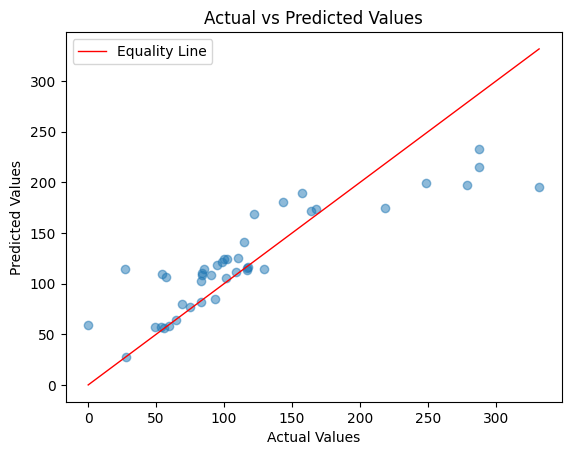

Mean Absolute Error: 27.12
Mean Squared Error: 1562.45
Root Mean Squared Error: 39.53
R-squared: 0.72
Adjusted R-squared: 0.54


In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

rf_metrics = {
    'Model': 'Random Forest Regressor',
    **plot_and_evaluate(rf, X_test_scaled, y_test)
}

metrics_list.append(rf_metrics)

/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


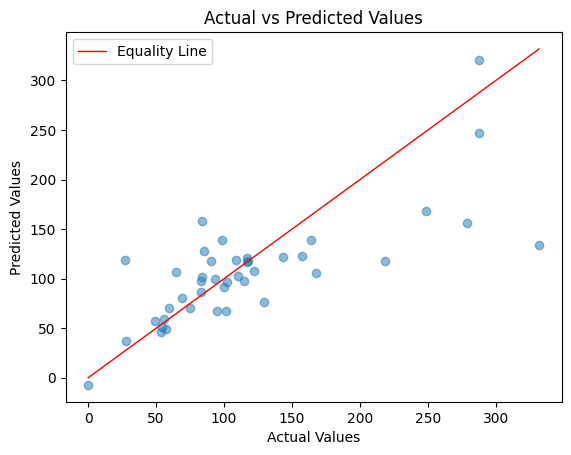

Mean Absolute Error: 31.78
Mean Squared Error: 2533.03
Root Mean Squared Error: 50.33
R-squared: 0.54
Adjusted R-squared: 0.25


In [50]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

lm_metrics = {
    'Model': 'Linear Regression',
    **plot_and_evaluate(lm, X_test, y_test)
}
metrics_list.append(lm_metrics)


/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151.44933092558858, tolerance: 38.55747379801394
  model = cd_fast.enet_coordinate_descent_gram(
/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.59019372588955, tolerance: 36.57349073992312
  model = cd_fast.enet_coordinate_descent_gram(
/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number o

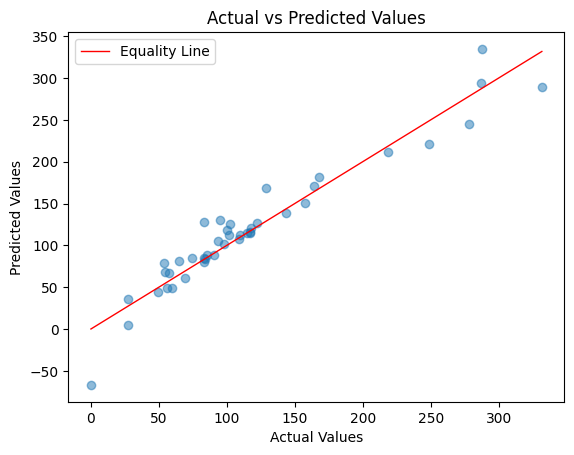

Mean Absolute Error: 14.52
Mean Squared Error: 448.55
Root Mean Squared Error: 21.18
R-squared: 0.92
Adjusted R-squared: 0.87


In [51]:
from sklearn.linear_model import LassoCV

# Assuming you've trained a Lasso Regression model named 'lasso_model'
lasso_model = LassoCV()
lasso_model.fit(X_train_scaled, y_train)

lasso_model_metrics = {
    'Model': 'Linear Regression with Lasso Regularization',
    **plot_and_evaluate(lasso_model, X_test_scaled, y_test)
}
metrics_list.append(lasso_model_metrics)

/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


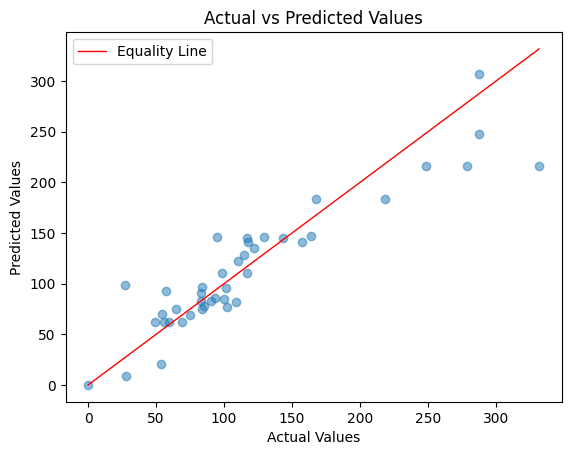

Mean Absolute Error: 20.83
Mean Squared Error: 896.15
Root Mean Squared Error: 29.94
R-squared: 0.84
Adjusted R-squared: 0.74


In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

tree_model_metrics = {
    'Model': 'Decision Tree Regressor',
    **plot_and_evaluate(tree_model, X_test, y_test)
}
metrics_list.append(tree_model_metrics)


/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


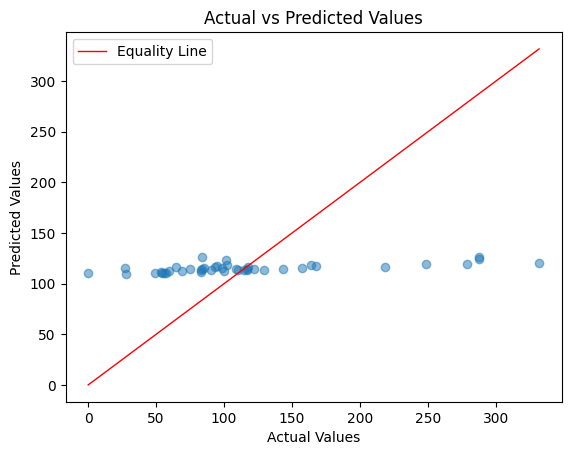

Mean Absolute Error: 52.03
Mean Squared Error: 5177.6
Root Mean Squared Error: 71.96
R-squared: 0.07
Adjusted R-squared: -0.53


In [53]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming you've trained an SVR model named 'svr_model'
svr_model = SVR()

svr_model.fit(X_train_scaled, y_train)

svr_model_metrics = {
    'Model': 'Support Vectors Regressor',
    **plot_and_evaluate(svr_model, X_test_scaled, y_test)
}
metrics_list.append(svr_model_metrics)

/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


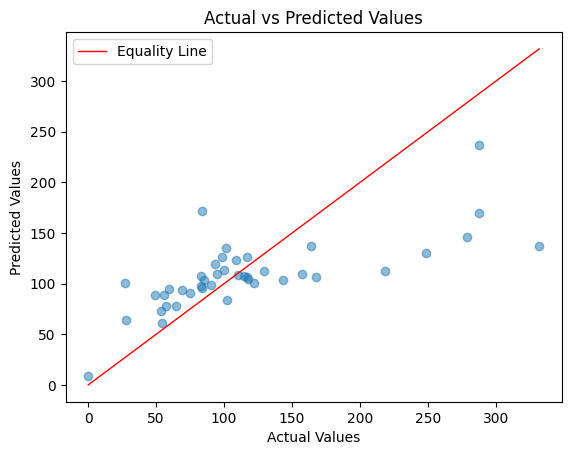

Mean Absolute Error: 38.44
Mean Squared Error: 3139.55
Root Mean Squared Error: 56.03
R-squared: 0.43
Adjusted R-squared: 0.07


In [54]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

knn_model_metrics = {
    'Model': 'KNeighbors Regressor',
    **plot_and_evaluate(knn_model, X_test_scaled, y_test)
}
metrics_list.append(knn_model_metrics)

In [55]:
evaluation_df = pd.DataFrame(metrics_list)

evaluation_df = evaluation_df.drop(columns=['Model', 'mse'], axis=1)
evaluation_df

,mae,rmse,r2,adj_r2
0,27.12,39.53,0.72,0.54
1,31.78,50.33,0.54,0.25
2,14.52,21.18,0.92,0.87
3,20.83,29.94,0.84,0.74
4,52.03,71.96,0.07,-0.53
5,38.44,56.03,0.43,0.07
